## AAI 510 - Assignment 2
by Bryan Carr
23 May 2022
University of San Diego

In this assignment we will explore Decision Trees and Random Forests, and evaluate the importance of attributes in their building. We will continue to use the Home Credit dataset from Kaggle.com
https://www.kaggle.com/competitions/home-credit-default-risk/data

# Initial Setup and Importing

First we need to import our libraries and data.

In [304]:
## Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier



In [305]:
## Reading in the Data

application_df = pd.read_csv('data/application_train.csv')

In [306]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [307]:
application_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


We will pull out the Target data, as Y:

In [308]:
Y = application_df.loc[:,'TARGET']

Now we must split our data into Test and Train, as the competition's Test data is lacking Target info (which would possibly invalidate the competition).

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(application_df, Y, test_size = 0.2, random_state = 1234)

# Quesiton 1 - First Decision Tree

We will slice out our top 10 variables to create our first decision tree. For simplicity's sake, we will ignore the Categorical variables (we will incorporate them in the Random Forest stage). We also observed that AMT_CREDIT and AMT_ANNUITY are tightly related (Total Size of Loan vs Size of Loan Payment, respectively) - we will only include the AMT_CREDIT in this initial tree, to bring us down to 10 variables. I'm choosing to keep it as it may have some relation with AMT_GOODS_PRICE, the price of the home being applied for.

In [310]:
tree_vars_numeric = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',  'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',  'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [311]:
X_train_first = X_train.filter(items = tree_vars_numeric, axis=1)

X_train_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 251704 to 165158
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_INCOME_TOTAL             246008 non-null  float64
 1   AMT_CREDIT                   246008 non-null  float64
 2   AMT_GOODS_PRICE              245775 non-null  float64
 3   CNT_FAM_MEMBERS              246006 non-null  float64
 4   DAYS_BIRTH                   246008 non-null  int64  
 5   DAYS_EMPLOYED                246008 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY  246008 non-null  int64  
 7   EXT_SOURCE_1                 107345 non-null  float64
 8   EXT_SOURCE_2                 245495 non-null  float64
 9   EXT_SOURCE_3                 197201 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 20.6 MB


In [312]:
# Now we need to fill in some NAN values. Let's fill:

#Amt_Goods_Price NANs with the Amt_Credit:
X_train_first['AMT_GOODS_PRICE'].fillna(X_train_first['AMT_CREDIT'], inplace=True)

# For the other NANs - Count_Family_Members and the External_Source Scores, we will use the Mean in a Simple Imputer:
first_tree_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_first_imp = pd.DataFrame(first_tree_imputer.fit_transform(X_train_first), columns=X_train_first.columns, index=X_train_first.index)

In [313]:
X_train_first_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 251704 to 165158
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_INCOME_TOTAL             246008 non-null  float64
 1   AMT_CREDIT                   246008 non-null  float64
 2   AMT_GOODS_PRICE              246008 non-null  float64
 3   CNT_FAM_MEMBERS              246008 non-null  float64
 4   DAYS_BIRTH                   246008 non-null  float64
 5   DAYS_EMPLOYED                246008 non-null  float64
 6   REGION_RATING_CLIENT_W_CITY  246008 non-null  float64
 7   EXT_SOURCE_1                 246008 non-null  float64
 8   EXT_SOURCE_2                 246008 non-null  float64
 9   EXT_SOURCE_3                 246008 non-null  float64
dtypes: float64(10)
memory usage: 20.6 MB


In [314]:
## Let's run the same steps to prepare our Test data
## NOTE - we must not re-Fit the imputer, to avoid any leakage with the Test data. It must be treated and transformed the same way as our Training data, and re-fitting would re-compute the Means.


X_test_first = X_test.filter(items = tree_vars_numeric, axis=1)
X_test_first_imp = pd.DataFrame(first_tree_imputer.transform(X_test_first), columns=X_test_first.columns, index=X_test_first.index)

In [315]:
# I will pre-prune the tree with Min_Samples_Split, so that nodes with less than N samples are not further split

first_tree = tree.DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=123)


In [316]:
first_tree.fit(X_train_first_imp, Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=123)

[Text(1568.5505319148938, 2831.25, 'EXT_SOURCE_2 <= 0.379\ngini = 0.149\nsamples = 246008\nvalue = [226117, 19891]'),
 Text(789.8404255319149, 2453.75, 'EXT_SOURCE_3 <= 0.347\ngini = 0.249\nsamples = 58176\nvalue = [49706, 8470]'),
 Text(384.2021276595745, 2076.25, 'EXT_SOURCE_3 <= 0.146\ngini = 0.375\nsamples = 12117\nvalue = [9089, 3028]'),
 Text(174.7872340425532, 1698.75, 'EXT_SOURCE_2 <= 0.15\ngini = 0.449\nsamples = 2816\nvalue = [1859, 957]'),
 Text(72.55319148936171, 1321.25, 'AMT_CREDIT <= 184142.25\ngini = 0.49\nsamples = 942\nvalue = [536, 406]'),
 Text(26.382978723404257, 943.75, 'EXT_SOURCE_2 <= 0.001\ngini = 0.35\nsamples = 106\nvalue = [82, 24]'),
 Text(13.191489361702128, 566.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(39.57446808510639, 566.25, 'DAYS_EMPLOYED <= -803.5\ngini = 0.308\nsamples = 100\nvalue = [81, 19]'),
 Text(26.382978723404257, 188.75, '\n  (...)  \n'),
 Text(52.765957446808514, 188.75, '\n  (...)  \n'),
 Text(118.72340425531915, 943.75, 'EX

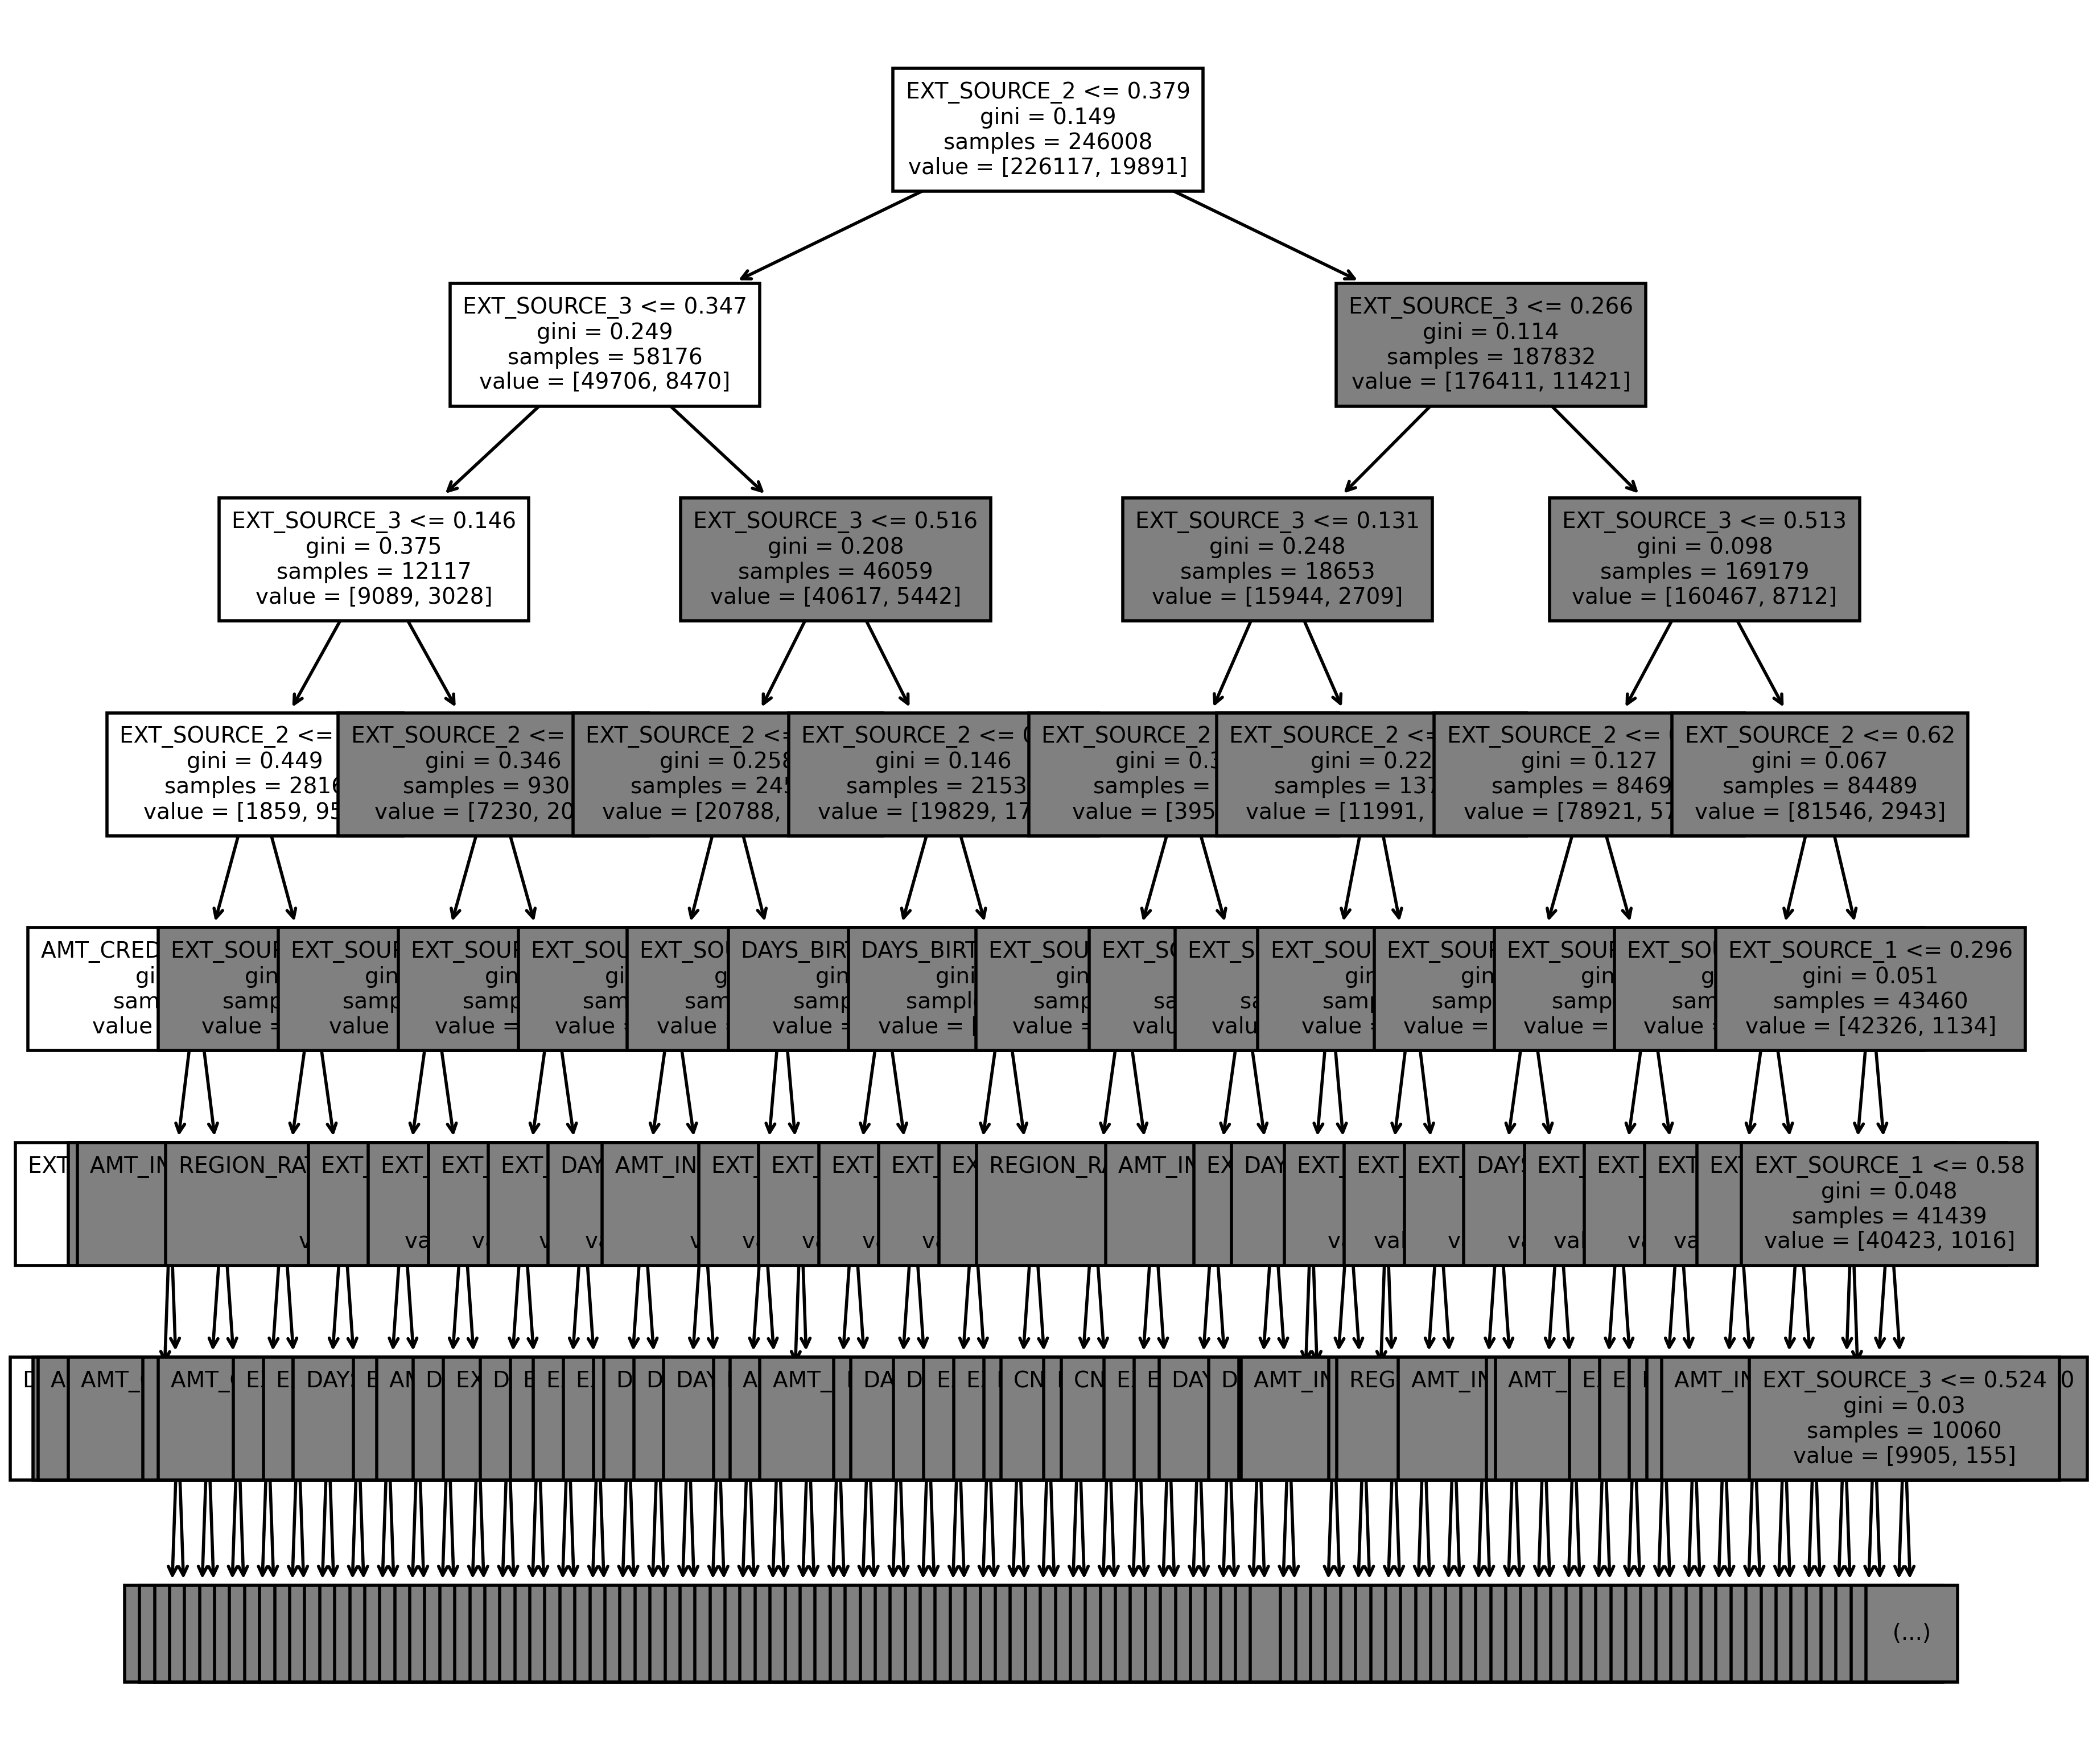

In [367]:
# Now I will plot the decision tree
plt.figure(figsize=(10,10), dpi=400)
tree.plot_tree(first_tree, max_depth = 6, feature_names = X_train_first_imp.columns, fontsize=7)

It's a very busy tree, even with limiting the max depth to assist in readability. However, we can easily see that the External Source scores dominate the upper levels, with other variables only coming in around Depth=4.

Now let's evaluate the tree on our Training data to see how well it's doing. Unfortunately, the competition's Test dataset

In [318]:
# Training Accuracy score is

first_tree_train_acc = first_tree.score(X_train_first_imp, Y_train)
print("Training Accuracy for First Tree (with my variable picks): " + str(first_tree_train_acc))

Training Accuracy for First Tree (with my variable picks): 0.9410059835452506


In [319]:
# Accuracy on Test Data
first_tree_test_acc = first_tree.score(X_test_first_imp, Y_test)
print('Test Accuracy for First Tree (my variable picks): ' + str(first_tree_test_acc))

Test Accuracy for First Tree (my variable picks): 0.897500934913744


89% is not horrible for a first attempt. Let's continue with using a Random Forest to identify the most important features.

## Question 2 - Random Forest for Feature Importance

I will begin by trimming the features relating to the property out of the dataset, as they are full of NANs. After that, I will

In [320]:
X_train_q2 = X_train.drop('SK_ID_CURR', axis=1)
X_train_q2 = X_train_q2.drop(X_train_q2.columns[43:90], axis=1)
X_train_q2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
251704,0,Cash loans,M,Y,Y,0,90000.0,207396.0,12816.0,157500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
199948,0,Cash loans,F,N,N,0,135000.0,328500.0,34987.5,328500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
48195,0,Cash loans,F,N,Y,0,225000.0,1123443.0,32845.5,981000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,2.0
81199,0,Cash loans,M,Y,Y,0,103500.0,203760.0,16227.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
185163,0,Cash loans,F,N,N,0,270000.0,608166.0,57874.5,585000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,0,Cash loans,M,Y,N,1,103500.0,526491.0,32337.0,454500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
41239,0,Cash loans,M,N,Y,0,135000.0,314100.0,16573.5,225000.0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
294543,0,Cash loans,F,Y,Y,0,135000.0,521280.0,27423.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
220532,0,Cash loans,F,N,Y,1,112500.0,523431.0,34978.5,427500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
X_train_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 251704 to 165158
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       246008 non-null  int64  
 1   NAME_CONTRACT_TYPE           246008 non-null  object 
 2   CODE_GENDER                  246008 non-null  object 
 3   FLAG_OWN_CAR                 246008 non-null  object 
 4   FLAG_OWN_REALTY              246008 non-null  object 
 5   CNT_CHILDREN                 246008 non-null  int64  
 6   AMT_INCOME_TOTAL             246008 non-null  float64
 7   AMT_CREDIT                   246008 non-null  float64
 8   AMT_ANNUITY                  245999 non-null  float64
 9   AMT_GOODS_PRICE              245775 non-null  float64
 10  NAME_TYPE_SUITE              244952 non-null  object 
 11  NAME_INCOME_TYPE             246008 non-null  object 
 12  NAME_EDUCATION_TYPE          246008 non-null  object 

In [322]:
# A NAN for Occupation_Type is not fair to make any guesses about Occupation Type, or the previous credit requests (last columns), or the client's Social Circle, or the Name of Accompanyment. We also do not have the loan length info to make any guesses about the Amount of Annuity.
# In the future a KNN Imputer might be useful for Occupation Type, as there is an Income Type column which is likely related.
# I will create a list of columns to search through, and drop all Rows containing NAs in those columns
#It is probably not fair to keep the External Scores either, as we don't know much about what they represent or where they come from. I will also drop their Null values as well, even if it's a lot.

Columns_to_dropna = ['OCCUPATION_TYPE']
Columns_to_dropna.extend(X_train_q2.columns[43:47]) #Social Circle Default-By-Date
Columns_to_dropna.extend(X_train_q2.columns[68:]) #Amount of Credit Bureau Requests
Columns_to_dropna.append('AMT_ANNUITY')
Columns_to_dropna.append('NAME_TYPE_SUITE')
Columns_to_dropna.extend(X_train_q2.columns[40:43]) #External Scores

Columns_to_dropna

['OCCUPATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [323]:
X_train_q2.dropna(axis=0, subset=Columns_to_dropna, inplace=True)
X_train_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65491 entries, 199948 to 73180
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       65491 non-null  int64  
 1   NAME_CONTRACT_TYPE           65491 non-null  object 
 2   CODE_GENDER                  65491 non-null  object 
 3   FLAG_OWN_CAR                 65491 non-null  object 
 4   FLAG_OWN_REALTY              65491 non-null  object 
 5   CNT_CHILDREN                 65491 non-null  int64  
 6   AMT_INCOME_TOTAL             65491 non-null  float64
 7   AMT_CREDIT                   65491 non-null  float64
 8   AMT_ANNUITY                  65491 non-null  float64
 9   AMT_GOODS_PRICE              65491 non-null  float64
 10  NAME_TYPE_SUITE              65491 non-null  object 
 11  NAME_INCOME_TYPE             65491 non-null  object 
 12  NAME_EDUCATION_TYPE          65491 non-null  object 
 13  NAME_FAMILY

In [324]:
X_train_q2.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 74, dtype: int64

There are a lot of Null for Age of Car. These are likely from not owning a car, which is another variable we can check against.

In [325]:
X_train_q2[X_train_q2['FLAG_OWN_CAR'] == 'N'].isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 74, dtype: int64

In [326]:
# All but one Null for Own_Car_Age is acocunted for as I expected. We can will it in with a representative value, say -1, based on positive round numbers for the other values.

X_train_q2['OWN_CAR_AGE'].fillna(value=-1.0, inplace=True)

We now have clean data, ready to convert our Categorical Variables and break off the Y Values.

In [327]:
Y_train_q2 = X_train_q2['TARGET']
X_train_q2.drop('TARGET', axis=1, inplace=True)

In [328]:
X_train_q2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
199948,Cash loans,F,N,N,0,135000.0,328500.0,34987.5,328500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
81199,Cash loans,M,Y,Y,0,103500.0,203760.0,16227.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
24943,Cash loans,F,N,Y,1,450000.0,1113840.0,50463.0,900000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
228716,Cash loans,F,N,N,1,225000.0,646344.0,17901.0,423000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
202700,Cash loans,F,Y,N,1,135000.0,1288350.0,37800.0,1125000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68851,Cash loans,F,Y,Y,0,216000.0,760122.0,21033.0,544500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,3.0,2.0,1.0
145402,Cash loans,F,Y,Y,1,81000.0,450000.0,24543.0,450000.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
283369,Cash loans,M,Y,Y,1,180000.0,491031.0,36067.5,463500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
167343,Cash loans,F,N,N,2,81000.0,562500.0,30514.5,562500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [329]:
X_train_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65491 entries, 199948 to 73180
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           65491 non-null  object 
 1   CODE_GENDER                  65491 non-null  object 
 2   FLAG_OWN_CAR                 65491 non-null  object 
 3   FLAG_OWN_REALTY              65491 non-null  object 
 4   CNT_CHILDREN                 65491 non-null  int64  
 5   AMT_INCOME_TOTAL             65491 non-null  float64
 6   AMT_CREDIT                   65491 non-null  float64
 7   AMT_ANNUITY                  65491 non-null  float64
 8   AMT_GOODS_PRICE              65491 non-null  float64
 9   NAME_TYPE_SUITE              65491 non-null  object 
 10  NAME_INCOME_TYPE             65491 non-null  object 
 11  NAME_EDUCATION_TYPE          65491 non-null  object 
 12  NAME_FAMILY_STATUS           65491 non-null  object 
 13  NAME_HOUSIN

In [330]:
binary_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

categorical_columns = ['NAME_CONTRACT_TYPE']
categorical_columns.extend(X_train_q2.columns[9:14]) #Named Variables
categorical_columns.append('OCCUPATION_TYPE')
categorical_columns.append('WEEKDAY_APPR_PROCESS_START')
categorical_columns.append('ORGANIZATION_TYPE')

categorical_columns

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [331]:
# I will now make a pipeline to One Hot Encode the Binary variables, and Label Encode the Categorical variables
binary_ohe = OneHotEncoder(drop='if_binary')
le = LabelEncoder()


In [332]:
q2_column_transformer = make_column_transformer(
    (binary_ohe, binary_columns),
    (OneHotEncoder(), categorical_columns),
    remainder='passthrough'
)

In [333]:
X_train_q2_transformed = q2_column_transformer.fit_transform(X_train_q2)

In [334]:
X_train_q2_transformed

array([[1., 0., 0., ..., 0., 0., 3.],
       [0., 1., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 0., 0., 4.]])

In [335]:
#Check the Feature Names:
q2_column_transformer.get_feature_names()

['onehotencoder-1__x0_F',
 'onehotencoder-1__x0_M',
 'onehotencoder-1__x0_XNA',
 'onehotencoder-1__x1_Y',
 'onehotencoder-1__x2_Y',
 'onehotencoder-2__x0_Cash loans',
 'onehotencoder-2__x0_Revolving loans',
 'onehotencoder-2__x1_Children',
 'onehotencoder-2__x1_Family',
 'onehotencoder-2__x1_Group of people',
 'onehotencoder-2__x1_Other_A',
 'onehotencoder-2__x1_Other_B',
 'onehotencoder-2__x1_Spouse, partner',
 'onehotencoder-2__x1_Unaccompanied',
 'onehotencoder-2__x2_Businessman',
 'onehotencoder-2__x2_Commercial associate',
 'onehotencoder-2__x2_State servant',
 'onehotencoder-2__x2_Student',
 'onehotencoder-2__x2_Working',
 'onehotencoder-2__x3_Academic degree',
 'onehotencoder-2__x3_Higher education',
 'onehotencoder-2__x3_Incomplete higher',
 'onehotencoder-2__x3_Lower secondary',
 'onehotencoder-2__x3_Secondary / secondary special',
 'onehotencoder-2__x4_Civil marriage',
 'onehotencoder-2__x4_Married',
 'onehotencoder-2__x4_Separated',
 'onehotencoder-2__x4_Single / not married

In [336]:
# Now we must perform the same drops and transforms on X_Test, as well as pulling the Target data out after the drops

X_test_q2 = X_test.drop('SK_ID_CURR', axis=1)
X_test_q2 = X_test_q2.drop(X_test_q2.columns[43:90], axis=1)
X_test_q2.dropna(axis=0, subset=Columns_to_dropna, inplace=True)
X_test_q2['OWN_CAR_AGE'].fillna(value=-1.0, inplace=True)

In [337]:
Y_test_q2 = X_test_q2['TARGET']
X_test_q2.drop('TARGET', axis=1, inplace=True)

In [338]:
X_test_q2_transformed = q2_column_transformer.transform(X_test_q2)

Now we are finally ready to build the Random Forest. I will use similar parameters as above

In [339]:
q2_forest = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=10, n_jobs=-1, random_state=1234, verbose=1)

In [340]:
q2_forest.fit(X_train_q2_transformed, Y_train_q2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomForestClassifier(max_depth=30, min_samples_split=10, n_jobs=-1,
                       random_state=1234, verbose=1)

In [341]:
q2_importances = q2_forest.feature_importances_
pd.DataFrame(q2_importances).nlargest(20,0)

,0
146,0.081855
144,0.065332
145,0.063662
124,0.043086
123,0.041609
126,0.040847
125,0.039346
120,0.036096
151,0.034307
119,0.032855


In [342]:
q2_importance_df = pd.DataFrame(q2_importances)
q2_importance_df['feature_name'] = q2_column_transformer.get_feature_names()

q2_importance_df

,0,feature_name
0,0.003475,onehotencoder-1__x0_F
1,0.003590,onehotencoder-1__x0_M
2,0.000000,onehotencoder-1__x0_XNA
3,0.003466,onehotencoder-1__x1_Y
4,0.004191,onehotencoder-1__x2_Y
...,...,...
173,0.002207,AMT_REQ_CREDIT_BUREAU_DAY
174,0.003596,AMT_REQ_CREDIT_BUREAU_WEEK
175,0.008052,AMT_REQ_CREDIT_BUREAU_MON
176,0.007632,AMT_REQ_CREDIT_BUREAU_QRT


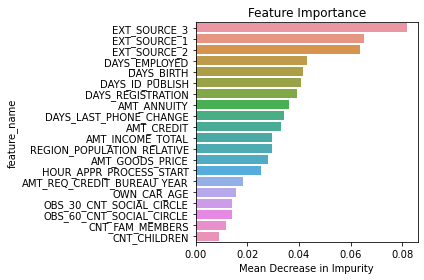

In [343]:
#Here is the requested Plot:

top_20_imp = q2_importance_df.nlargest(20,0)

fig, ax = plt.subplots()
top_20_plot = sns.barplot(y='feature_name', x=0, data=top_20_imp)
ax.set_xlabel("Mean Decrease in Impurity")
ax.set_title("Feature Importance")
fig.tight_layout()

In [344]:
q2_importance_df.nlargest(11,0)

,0,feature_name
146,0.081855,EXT_SOURCE_3
144,0.065332,EXT_SOURCE_1
145,0.063662,EXT_SOURCE_2
124,0.043086,DAYS_EMPLOYED
123,0.041609,DAYS_BIRTH
126,0.040847,DAYS_ID_PUBLISH
125,0.039346,DAYS_REGISTRATION
120,0.036096,AMT_ANNUITY
151,0.034307,DAYS_LAST_PHONE_CHANGE
119,0.032855,AMT_CREDIT


We can see the most 11 important features are as above, with some help defining them from the Kaggle source documentation:

External Scores 3/1/2
Days Employed
Days since Birth (Age)
Days_ID_Publish (How long since the applicant's ID was last updated)
Days_Registration (How long since the applicant last changed their registration - not clear what the registration is)
Amt_Annuity (Size of the Loan Payment)
Days_Last_Phone_Change (How long since the applicant's last change of phone)
Amt_Credit (total size of the loan)
Amt_Income_Total

Since Annuity and Credit are tightly related, I will ignore the less important one (Amt_Credit) in my final analysis, and use the 11 variable (Amt_Income_Total) instead


Days since ID Change, Days since Registration Change, and Days since Phone Change are all new variables that I had not expected. They replace, from my picks: Price of Goods, Size of Family, and Regional Rating with City. As well, we see the Amount of Annuity proves to be slightly more than the Amount of Credit (Loan Size) that I had picked.

Size of Loan vs Size of Payment is a minor distinction. It's not surprising that the Size of Payment is more a factor in payees missing a payment, in fact that makes a lot of sense. It also likely includes the info in Cost of Goods (i.e. the Cost of Goods is redundant, knowning the other information about payments).

The other new variables might reflect on an applicant's level of reliability or responsibility. Having updated documents & phone info shows they are likely to keep other personal affairs up to date as well, and have a level of organization required to manage their financial comittments.

We can also see in the plot that the 12 variable, Relative Region Population, is almost exactly as important as Total Income. I would normally include it as well, but the instructions are to deal only with the top 10, and I already feel bad for skipping Amt_Credit.

In [345]:
top_ten_vars = q2_importance_df.nlargest(11,0).loc[:,'feature_name'].tolist()
top_ten_vars.remove('AMT_CREDIT')
top_ten_vars

['EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL']

In [346]:
# We also need to score this model against Training and Testing data

q2_forest_train_acc = q2_forest.score(X_train_q2_transformed, Y_train_q2)
q2_forest_train_acc

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9378998641034646

In [347]:
#And for Test Accuracy:
q2_forest_test_acc = q2_forest.score(X_test_q2_transformed, Y_test_q2)
q2_forest_test_acc

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9244225025903577

## Question 3 - Rebuild using the Top 10 Variables

I'll now move on to rebuilding the Single Tree and Random Forest, using our Top 10 Variables as identified above in Q2.

As in Q1, I will filter the data by the top 10 variables, and reassess for any imputation needed.

In [348]:
top_ten_vars.append('TARGET') #We need to re-add the Target variables so any dropped can be tracked

X_train_q3 = X_train.filter(items = top_ten_vars, axis=1)
X_train_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 251704 to 165158
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   EXT_SOURCE_3            197201 non-null  float64
 1   EXT_SOURCE_1            107345 non-null  float64
 2   EXT_SOURCE_2            245495 non-null  float64
 3   DAYS_EMPLOYED           246008 non-null  int64  
 4   DAYS_BIRTH              246008 non-null  int64  
 5   DAYS_ID_PUBLISH         246008 non-null  int64  
 6   DAYS_REGISTRATION       246008 non-null  float64
 7   AMT_ANNUITY             245999 non-null  float64
 8   DAYS_LAST_PHONE_CHANGE  246007 non-null  float64
 9   AMT_INCOME_TOTAL        246008 non-null  float64
 10  TARGET                  246008 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 22.5 MB


In [349]:
# There are a few Annuity values missing, we will drop them as in Q2. Then run an imputer to calculate the means of the External Scores as in Q1.

X_train_q3.dropna(axis=0, subset=['AMT_ANNUITY'], inplace=True)
X_train_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245999 entries, 251704 to 165158
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   EXT_SOURCE_3            197193 non-null  float64
 1   EXT_SOURCE_1            107339 non-null  float64
 2   EXT_SOURCE_2            245486 non-null  float64
 3   DAYS_EMPLOYED           245999 non-null  int64  
 4   DAYS_BIRTH              245999 non-null  int64  
 5   DAYS_ID_PUBLISH         245999 non-null  int64  
 6   DAYS_REGISTRATION       245999 non-null  float64
 7   AMT_ANNUITY             245999 non-null  float64
 8   DAYS_LAST_PHONE_CHANGE  245998 non-null  float64
 9   AMT_INCOME_TOTAL        245999 non-null  float64
 10  TARGET                  245999 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 22.5 MB


In [350]:
# Now split off the Target variable as Y before Imputing
Y_train_q3 = X_train_q3['TARGET']
X_train_q3.drop('TARGET', axis=1, inplace=True)

In [351]:
# Now create and run the Imputer
q3_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_q3_imp = pd.DataFrame(q3_imputer.fit_transform(X_train_q3), columns=X_train_q3.columns, index=X_train_q3.index)

In [352]:
X_train_q3_imp.isnull().sum()

EXT_SOURCE_3              0
EXT_SOURCE_1              0
EXT_SOURCE_2              0
DAYS_EMPLOYED             0
DAYS_BIRTH                0
DAYS_ID_PUBLISH           0
DAYS_REGISTRATION         0
AMT_ANNUITY               0
DAYS_LAST_PHONE_CHANGE    0
AMT_INCOME_TOTAL          0
dtype: int64

In [353]:
# Now prepare our Test Data in the same way

X_test_q3 = X_test.filter(items = top_ten_vars, axis=1)
X_test_q3.dropna(axis=0, subset=['AMT_ANNUITY'], inplace=True)

# Split Target from the rest of Training data
Y_test_q3 = X_test_q3['TARGET']
X_test_q3.drop('TARGET', axis=1, inplace=True)

# Apply Imputer -- remember to only Transform, not Fit Transform, to apply the same values determined in Training
X_test_q3_imp = pd.DataFrame(q3_imputer.transform(X_test_q3), columns=X_test_q3.columns, index=X_test_q3.index)

Now let us build the Forest and Single Classification tree as before

In [354]:
q3_forest = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=10, n_jobs=-1, random_state=1234, verbose=1)

In [355]:
q3_forest.fit(X_train_q3_imp, Y_train_q3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


RandomForestClassifier(max_depth=30, min_samples_split=10, n_jobs=-1,
                       random_state=1234, verbose=1)

In [356]:
q3_single_tree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=1234)

In [357]:
q3_single_tree.fit(X_train_q3_imp, Y_train_q3)

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=1234)

In [358]:
#Let's score these lastest models

q3_forest_train_acc = q3_forest.score(X_train_q3_imp, Y_train_q3)
q3_forest_train_acc

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


0.9428127756616896

In [359]:
q3_forest_test_acc = q3_forest.score(X_test_q3_imp, Y_test_q3)
q3_forest_test_acc

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9198861788617886

In [360]:
q3_tree_train_acc = q3_single_tree.score(X_train_q3_imp, Y_train_q3)
q3_tree_train_acc

0.9213289484916606

In [361]:
q3_tree_test_acc = q3_single_tree.score(X_test_q3_imp, Y_test_q3)
q3_tree_test_acc

0.9180162601626016

[Text(1513.6792722968846, 2882.7272727272725, 'EXT_SOURCE_2 <= 0.379\ngini = 0.149\nsamples = 245999\nvalue = [226108, 19891]'),
 Text(708.5130956017105, 2608.181818181818, 'EXT_SOURCE_3 <= 0.347\ngini = 0.249\nsamples = 58174\nvalue = [49704, 8470]'),
 Text(277.96082773365913, 2333.6363636363635, 'EXT_SOURCE_3 <= 0.146\ngini = 0.375\nsamples = 12116\nvalue = [9088, 3028]'),
 Text(119.77703115455101, 2059.090909090909, 'EXT_SOURCE_2 <= 0.15\ngini = 0.449\nsamples = 2816\nvalue = [1859, 957]'),
 Text(56.337813072693955, 1784.5454545454545, 'EXT_SOURCE_1 <= 0.576\ngini = 0.49\nsamples = 942\nvalue = [536, 406]'),
 Text(25.56505803298717, 1510.0, 'DAYS_EMPLOYED <= -5983.0\ngini = 0.495\nsamples = 873\nvalue = [482, 391]'),
 Text(21.777642028100185, 1235.4545454545453, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(29.35247403787416, 1235.4545454545453, 'AMT_ANNUITY <= 9051.75\ngini = 0.496\nsamples = 859\nvalue = [468, 391]'),
 Text(7.574832009773977, 960.909090909091, 'EXT_SOURCE_2 

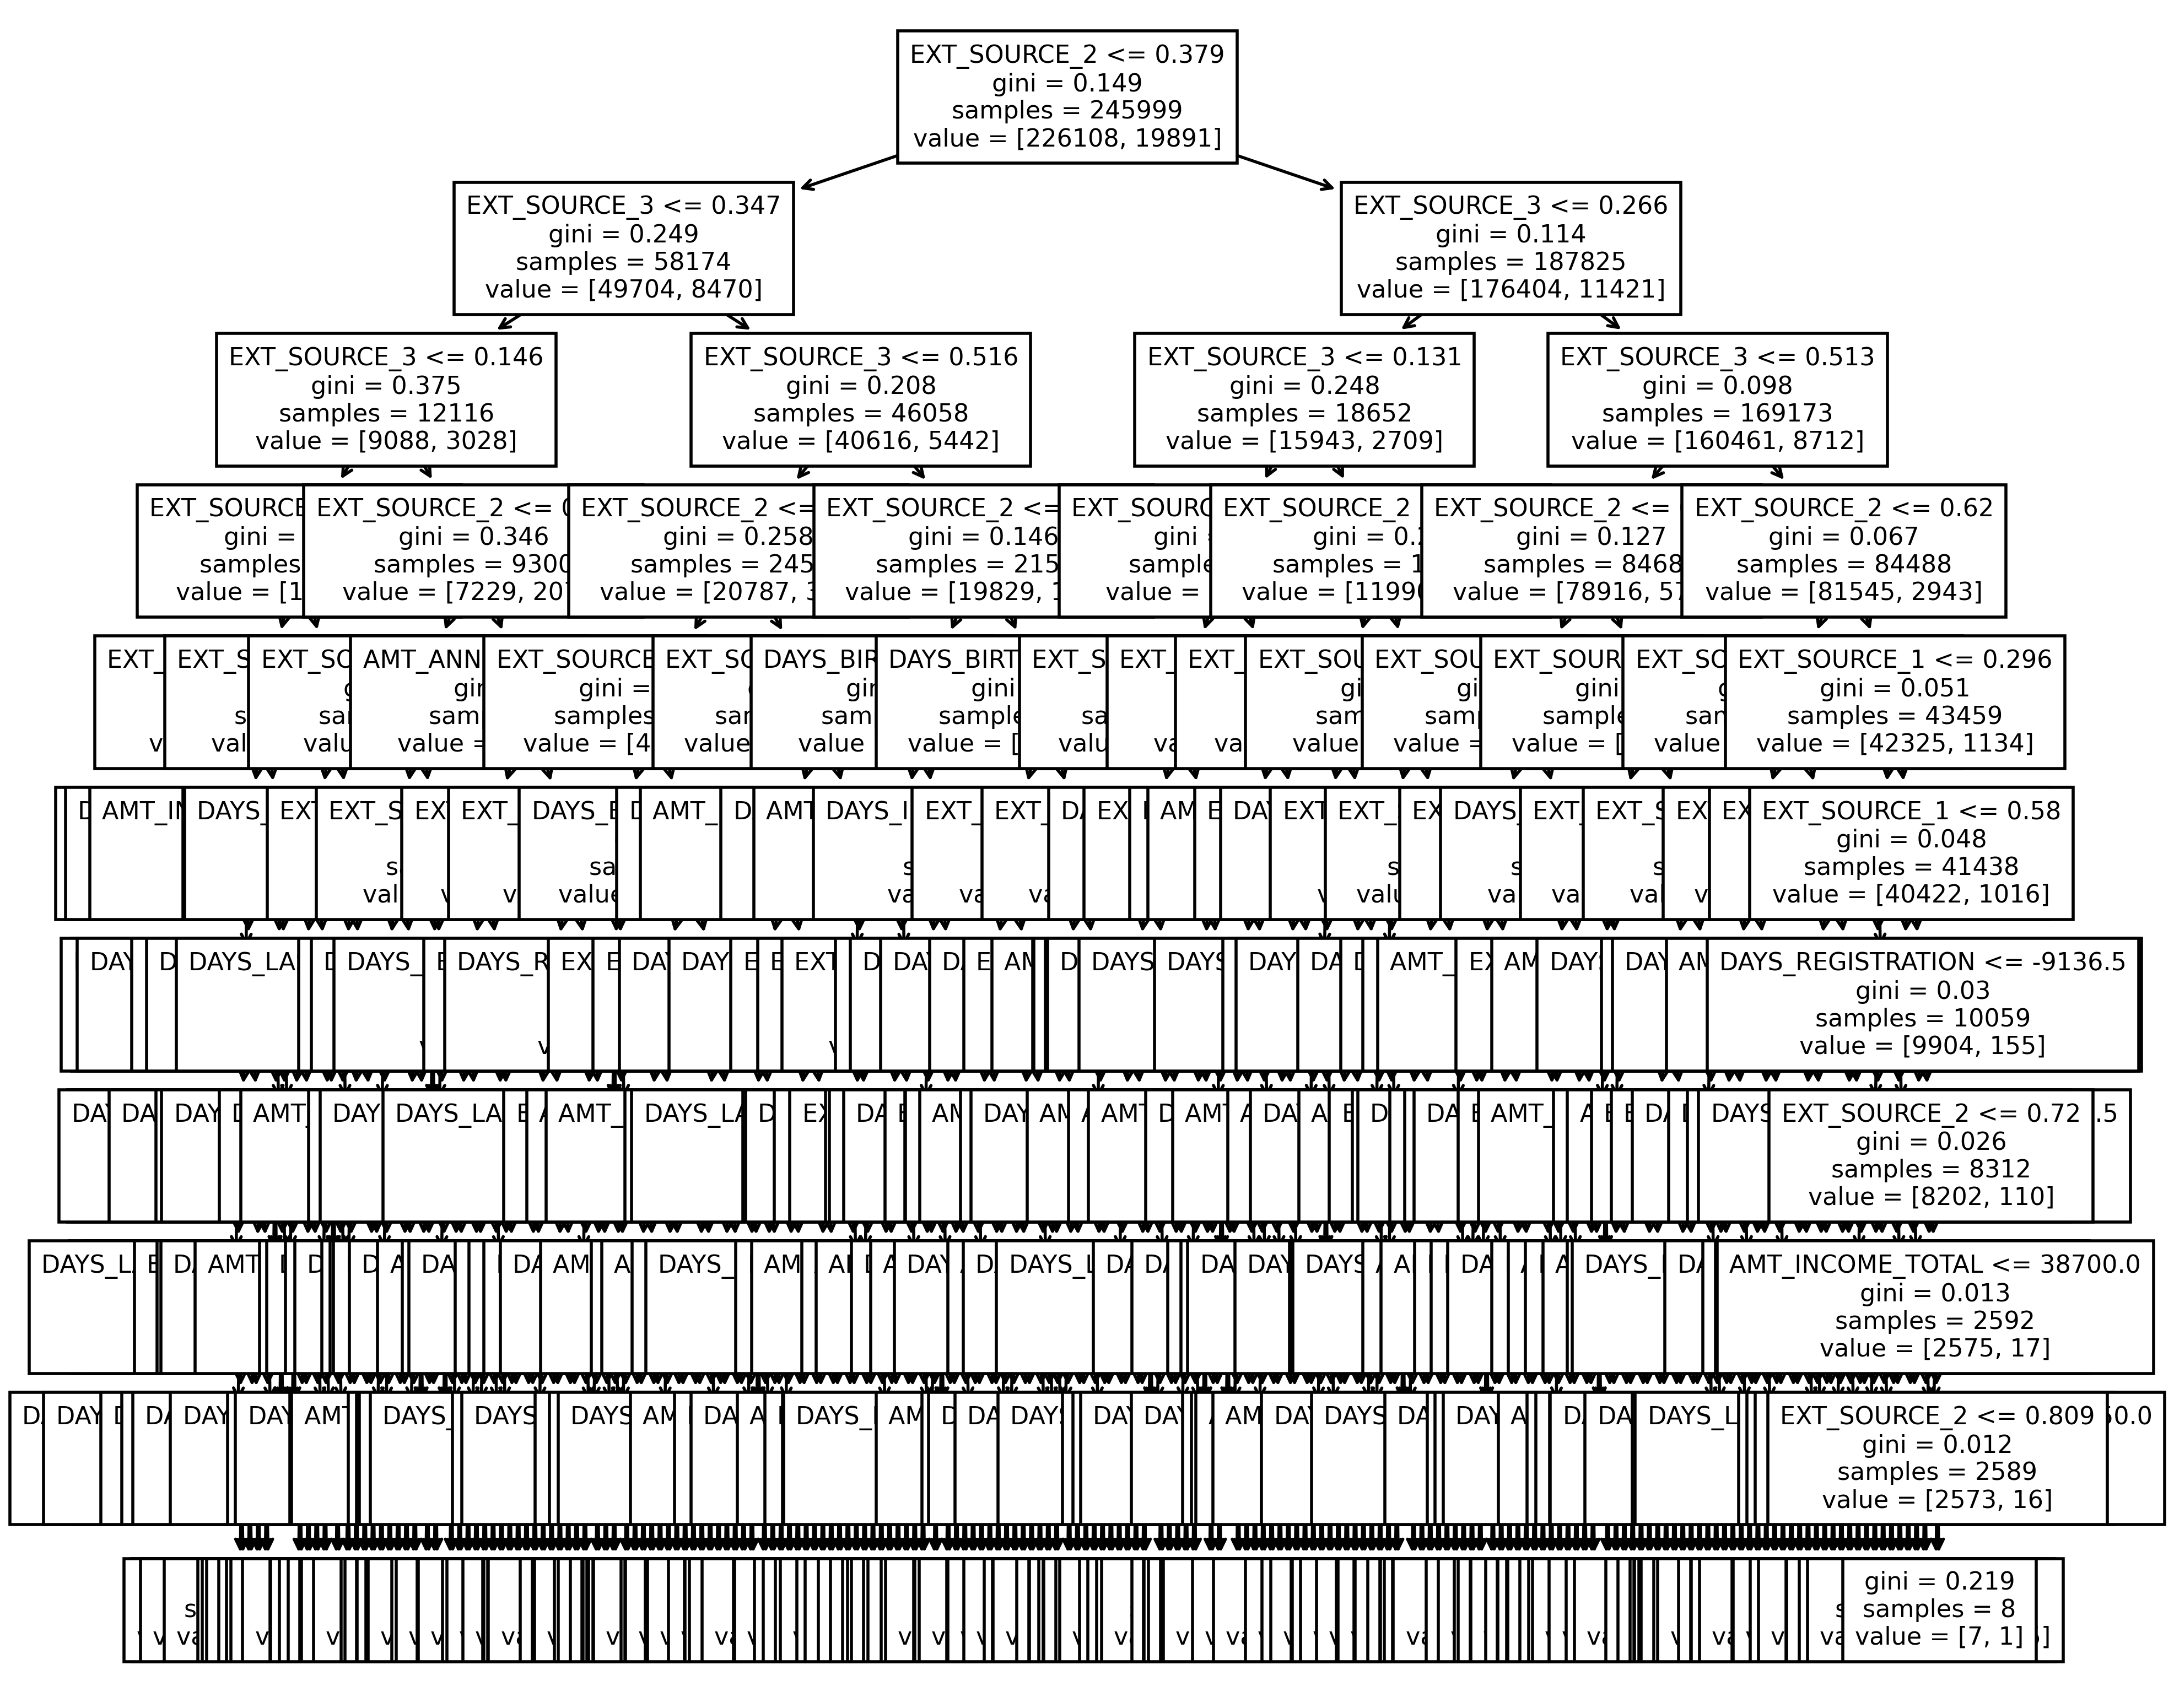

In [362]:
# Now let's plot the Single Tree as requested. Note that
plt.figure(figsize=(10,10), dpi=400)
tree.plot_tree(q3_single_tree, feature_names = X_train_q3_imp.columns, fontsize=8)

## Question 4 - Comparing the Results

In [363]:
# Build a dataframe with our results
# Type = Type of score, Train or Test
# Model = Question/Model implemented. Options: Q1 Single Tree; Q2 Forest; Q3 Forest; Q3 Single Tree

results_df = pd.DataFrame({
    'Score' : [first_tree_train_acc, first_tree_test_acc, q2_forest_train_acc, q2_forest_test_acc, q3_forest_train_acc, q3_forest_test_acc, q3_tree_train_acc, q3_tree_test_acc],
    'Model' : ['Q1 Single Tree', 'Q1 Single Tree', 'Q2 Forest', 'Q2 Forest', 'Q3 Forest', 'Q3 Forest', 'Q3 Single Tree', 'Q3 Single Tree'],
    'Type' : ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test']
})

In [364]:
results_df

,Score,Model,Type
0,0.941006,Q1 Single Tree,Train
1,0.897501,Q1 Single Tree,Test
2,0.937900,Q2 Forest,Train
3,0.924423,Q2 Forest,Test
4,0.942813,Q3 Forest,Train
5,0.919886,Q3 Forest,Test
6,0.921329,Q3 Single Tree,Train
7,0.918016,Q3 Single Tree,Test


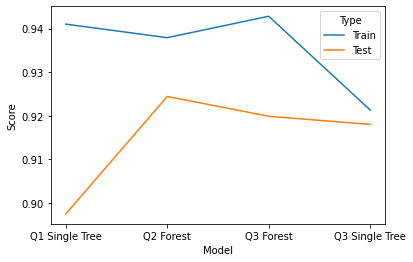

In [365]:
results_plot = sns.lineplot(
    data=results_df,
    x='Model',
    y='Score',
    hue='Type'
)
plt.show()

All sets have reasonably high scores, around and above 90%. This is due to the strong foundation offered by the outside agencies' credit scores, which are the most important variables for reducing impurity in the decision tree. It's not surprising that traditional methods applied by other users are giving us a strong indication of success paying down their home loan.

We can clearly see that the Q2 Forest - that is, the Random Forest with the wide dataset - has the highest Test accuracy. The Q3 single tree (made with the top ten variables) has the least difference between training and testing scores, therefore is the best generalization. This is likely thanks to the reduced size (I cut it down from 30 to 10 to aid in plotting), which reduces overfitting. It is performing better than the earlier tree thanks to the enhanced selection of variables we performed in Question #2 with the random forest.

I haven't felt the need to try any Pruning. The decision trees are very difficult to read when plotted at any substantial depth. However based on the depth used, we would likely need to prune back quite heavily to get something we can read, which would take away large parts of the model. It also seems quite computationally complex & lengthy in the examples in the sklearn documentation.